You are working with the government to transform your city into a smart city. The vision is to convert it into a digital and intelligent city to improve the efficiency of services for the citizens. One of the problems faced by the government is traffic. You are a data scientist working to manage the traffic of the city better and to provide input on infrastructure planning for the future.

The government wants to implement a robust traffic system for the city by being prepared for traffic peaks. They want to understand the traffic patterns of the four junctions of the city. Traffic patterns on holidays, as well as on various other occasions during the year, differ from normal working days. This is important to take into account for your forecasting.

To predict traffic patterns in each of these four junctions for the next 4 months.

The sensors on each of these junctions were collecting data at different times, hence you will see traffic data from different time periods. To add to the complexity, some of the junctions have provided limited or sparse data requiring thoughtfulness when creating future projections. Depending upon the historical data of 20 months, the government is looking to you to deliver accurate traffic projections for the coming four months. Your algorithm will become the foundation of a larger transformation to make your city smart and intelligent.


Import libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Import csv files

In [ ]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Traffic-Forecasting/main/train_aWnotuB.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Traffic-Forecasting/main/test_BdBKkAj.csv')
#Reading sample submission file:
sample = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Traffic-Forecasting/main/sample_submission_EZmX9uE.csv')

In [ ]:
train

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [ ]:
test

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041
...,...,...,...
11803,2017-10-31 19:00:00,4,20171031194
11804,2017-10-31 20:00:00,4,20171031204
11805,2017-10-31 21:00:00,4,20171031214
11806,2017-10-31 22:00:00,4,20171031224


In [ ]:
sample

,ID,Vehicles


Check for null values

In [ ]:
train.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [ ]:
test.isnull().sum()

DateTime    0
Junction    0
ID          0
dtype: int64

Prepare data

In [ ]:
ID_train = train.ID
ID_test = test.ID

In [ ]:
train.drop(['ID'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)
train

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9
...,...,...,...
48115,2017-06-30 19:00:00,4,11
48116,2017-06-30 20:00:00,4,30
48117,2017-06-30 21:00:00,4,16
48118,2017-06-30 22:00:00,4,22


In [ ]:
train.rename(columns={'DateTime':'ds', 'Junction': 'add1', 'Vehicles': 'y'}, inplace=True)
test.rename(columns={'DateTime':'ds', 'Junction': 'add1'}, inplace=True)
train

,ds,add1,y
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9
...,...,...,...
48115,2017-06-30 19:00:00,4,11
48116,2017-06-30 20:00:00,4,30
48117,2017-06-30 21:00:00,4,16
48118,2017-06-30 22:00:00,4,22


Graph data

Text(0, 0.5, 'y')

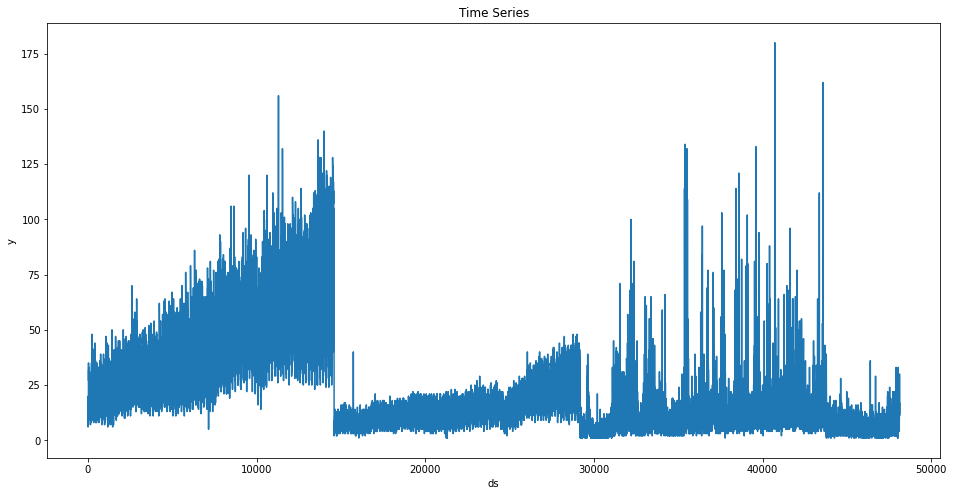

In [ ]:
import matplotlib.pyplot as plt

train['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

Split training set for testing and validation

In [ ]:
data_train = train.drop(['ds'], axis=1)
data_test = test.drop(['ds'], axis=1)

data_train.index = train.ds
data_test.index = test.ds

In [ ]:
#creating the train and validation set
X_train = data_train[:int(0.9*(len(data_train)))]
X_val = data_train[int(0.9*(len(data_train))):]
X_test = data_test

VAR

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=X_train)
model_fit = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Predict on validation set

In [ ]:
# make prediction on validation
yhat = model_fit.forecast(model_fit.y, steps=(len(X_val)))
yhat

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


array([[3.00001389, 8.96961122],
       [3.00002768, 8.94065177],
       [3.00004137, 8.91305402],
       ...,
       [3.05221739, 7.53416835],
       [3.05222737, 7.53401001],
       [3.05223735, 7.53385167]])

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_val.y, yhat[:,1])) 
print(rms)

6.278415674458498


In [ ]:
df_val=pd.DataFrame({'actual': X_val.y.values, 'predicted': yhat[:,1]})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual,predicted
0,17,8.969611
1,13,8.940652
2,9,8.913054
3,11,8.886754
4,12,8.861689
...,...,...
4807,11,7.534485
4808,30,7.534327
4809,16,7.534168
4810,22,7.534010


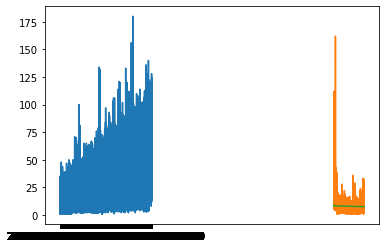

In [ ]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(X_train.y)
pyplot.plot([None for i in X_train.y] + [x for x in X_val.y])
pyplot.plot([None for i in X_train.y] + [x for x in yhat[:,1]])
pyplot.show()

Predict on test set

In [ ]:
model = VAR(endog=data_train)
model_fit = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
prediction = model_fit.forecast(model_fit.y, steps=(len(X_test)))
prediction

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


array([[ 4.00011032, 11.36659867],
       [ 4.0002173 , 10.76361873],
       [ 4.00032107, 10.18959785],
       ...,
       [ 4.44808525, -7.04581214],
       [ 4.44812047, -7.04627574],
       [ 4.44815568, -7.04673934]])

In [ ]:
output = pd.DataFrame({'ID': ID_test, 'Vehicles': prediction[:,0]})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
#upload submission
submission = pd.read_csv("submission.csv")
submission

,ID,Vehicles
0,20170701001,4.000110
1,20170701011,4.000217
2,20170701021,4.000321
3,20170701031,4.000422
4,20170701041,4.000520
...,...,...
11803,20171031194,4.448015
11804,20171031204,4.448050
11805,20171031214,4.448085
11806,20171031224,4.448120
